<a href="https://colab.research.google.com/github/Shinhunjun/Data-Analysis_Study/blob/main/22_11_15(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression

In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(data['data'], columns= data['feature_names'])

In [6]:
df['MEDV'] = data['target']

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',  1), df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [12]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [13]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00


In [14]:
y_train.head()

318    23.1
7      27.1
56     24.7
126    15.7
110    21.7
Name: MEDV, dtype: float64



```
# 코드로 형식 지정됨
```

## Evaluation

### MSE(Mean Squared Error)

${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$

### MAE (Mean Absolute Error)

$(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$

### RMSE (Root Mean Squared Error)

$\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$


In [15]:
import numpy as np

In [16]:
pred = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [17]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

In [18]:
my_mse(pred, actual)

4.0

In [19]:
def my_mae(pred, actual):
    return np.abs(pred-actual).mean()

In [20]:
my_mae(pred, actual)

2.0

In [22]:
def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

In [23]:
my_rmse(pred, actual)

2.0

### using sklearn evaluation tools




In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
my_mae(pred, actual), mean_absolute_error(pred, actual)

(2.0, 2.0)

In [26]:
my_mse(pred, actual), mean_squared_error(pred, actual)

(4.0, 4.0)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(n_jobs=-1)

In [30]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [31]:
pred = model.predict(x_test)

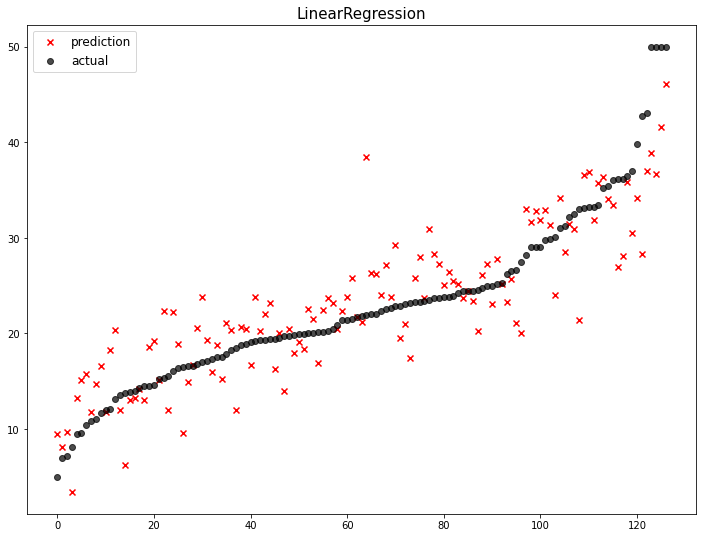

              model       mse
0  LinearRegression  20.94049


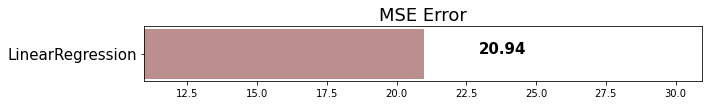

In [32]:
mse_eval('LinearRegression', pred, y_test)

## Regularization

**Ridge - L2 **

$Error=MSE+αw^2$ 

**Lasso - L1 **  

$Error=MSE+α|w|$

In [33]:
from sklearn.linear_model import Ridge

In [34]:

alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

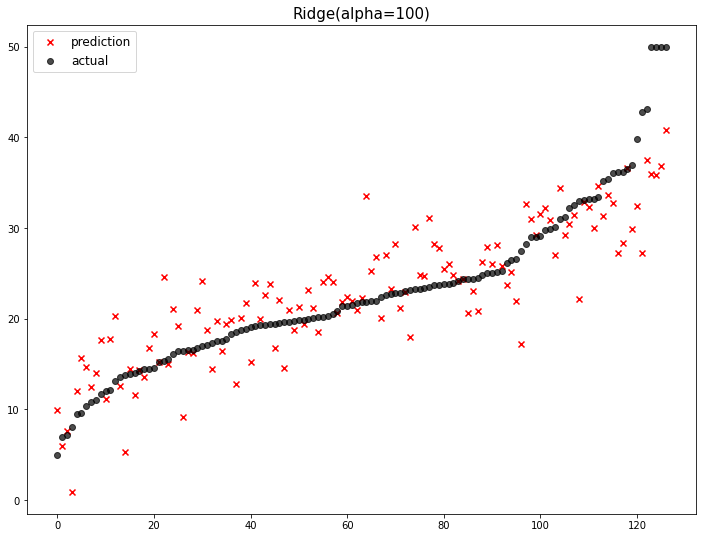

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


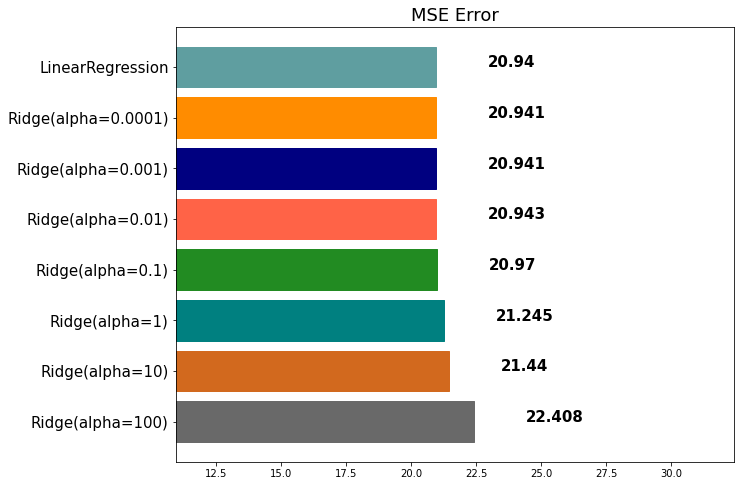

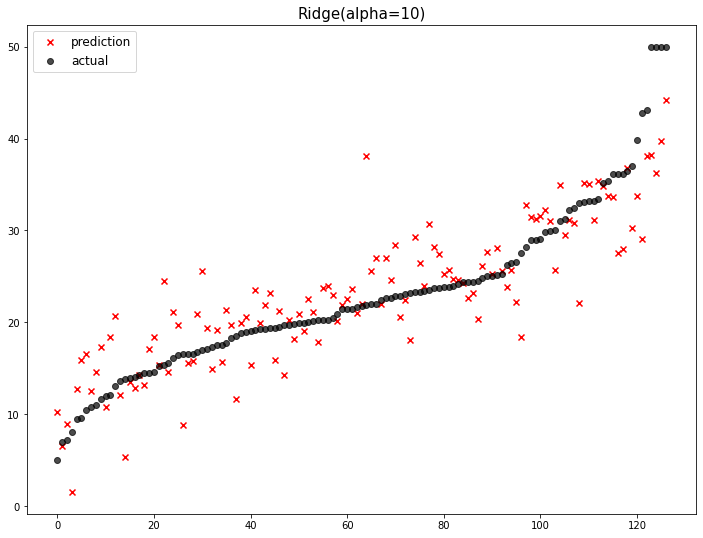

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


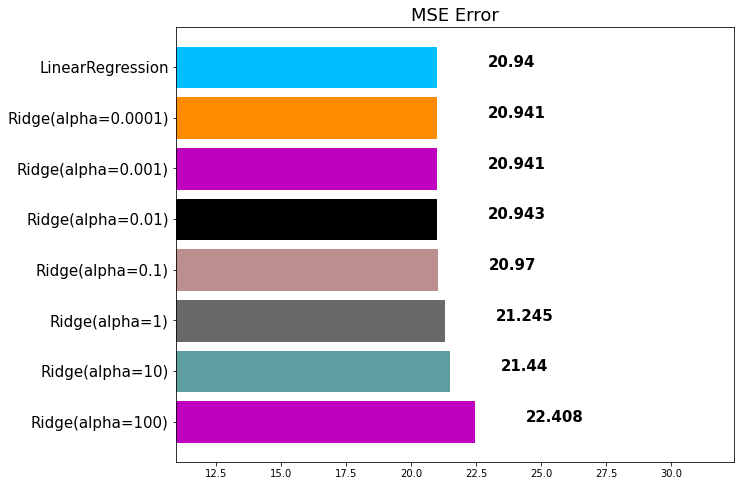

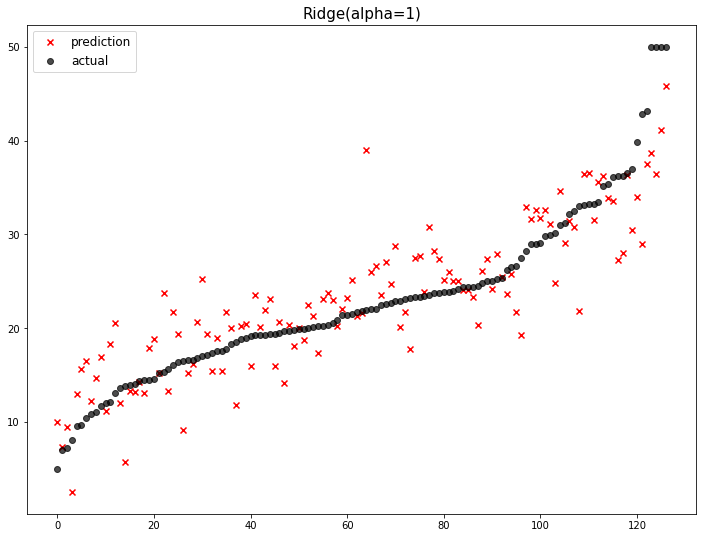

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


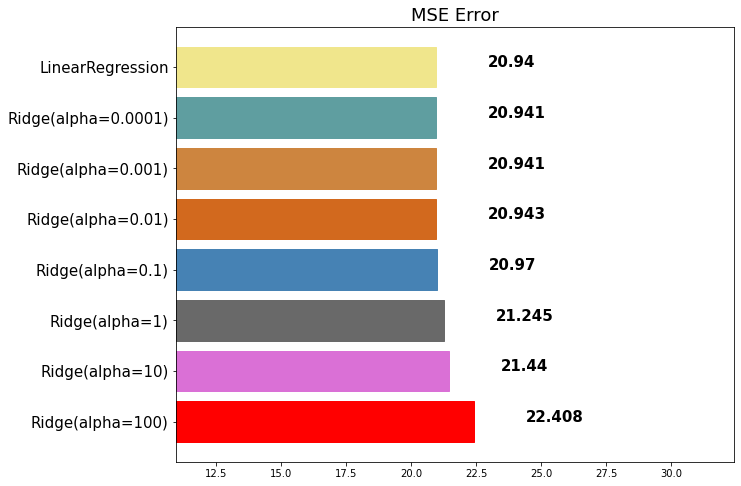

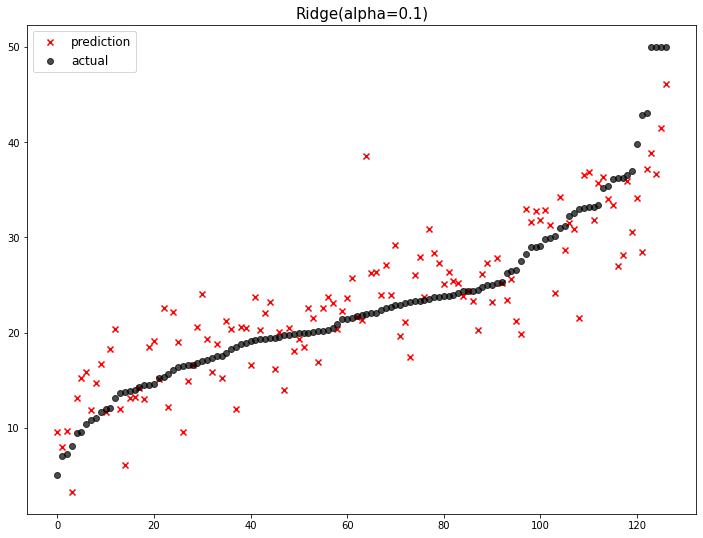

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


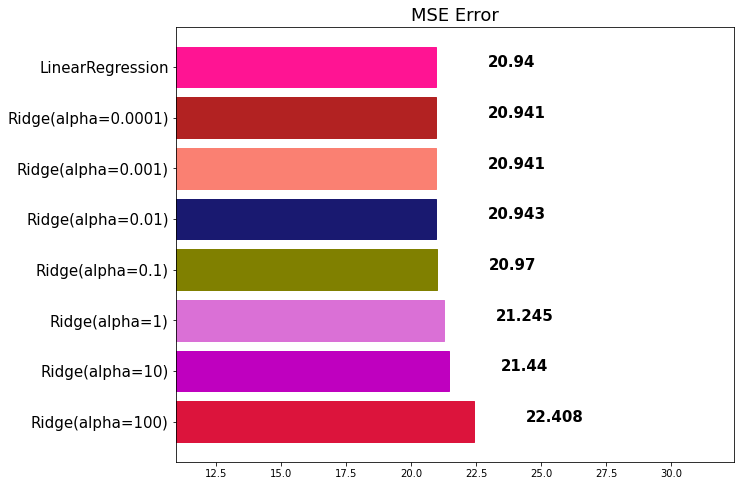

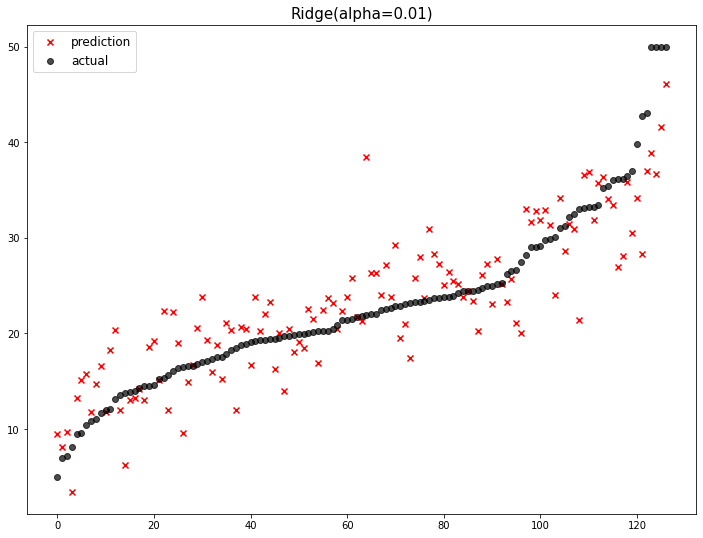

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


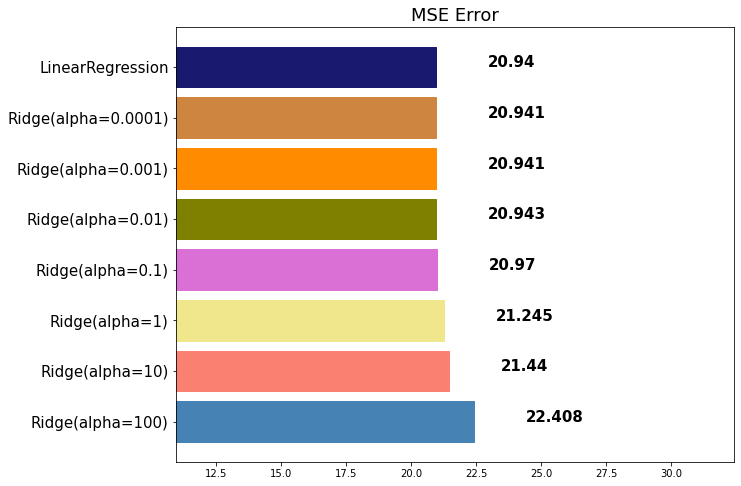

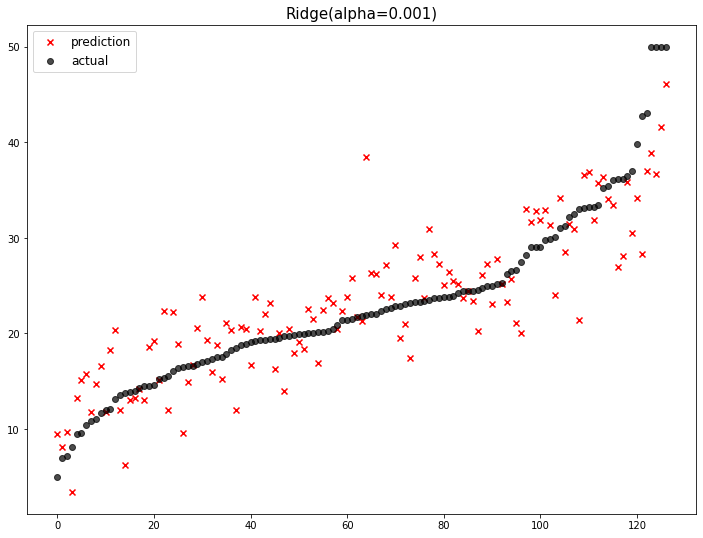

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


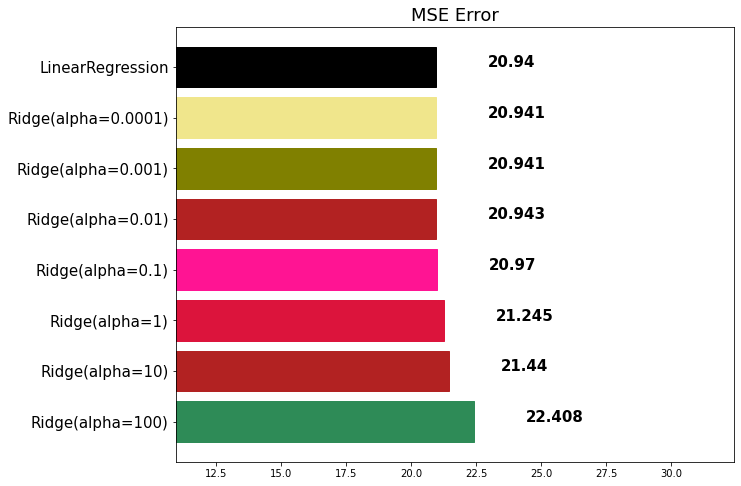

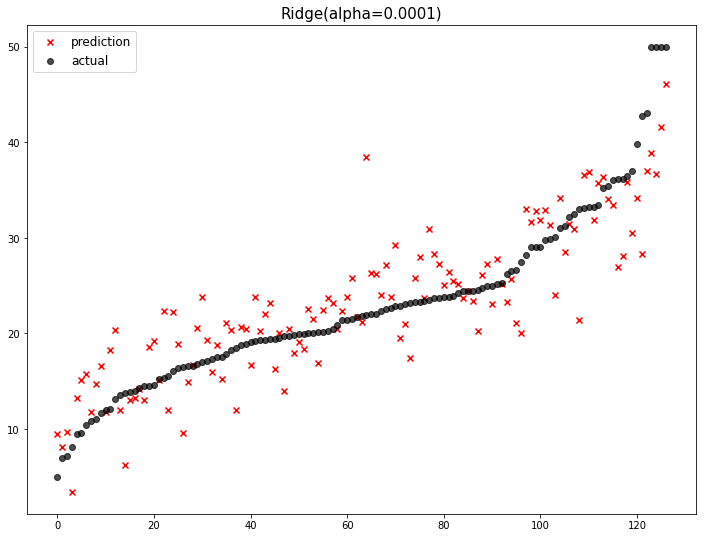

                 model        mse
0     Ridge(alpha=100)  22.408276
1      Ridge(alpha=10)  21.439933
2       Ridge(alpha=1)  21.244627
3     Ridge(alpha=0.1)  20.969924
4    Ridge(alpha=0.01)  20.943110
5   Ridge(alpha=0.001)  20.940748
6  Ridge(alpha=0.0001)  20.940516
7     LinearRegression  20.940490


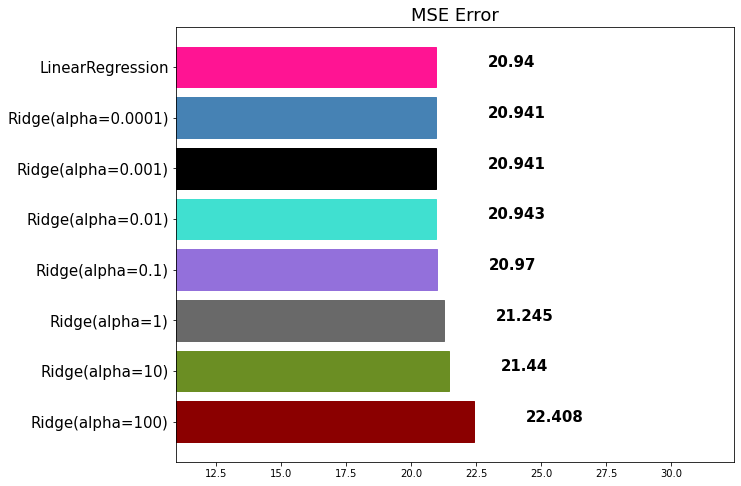

In [37]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [40]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [39]:
ridge.coef_

array([ -0.08979022,   0.06032287,   0.01699295,   4.02710216,
       -17.313669  ,   3.33782107,  -0.00871767,  -1.80807965,
         0.31045355,  -0.01255463,  -0.91111373,   0.00786205,
        -0.57644831])

In [41]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

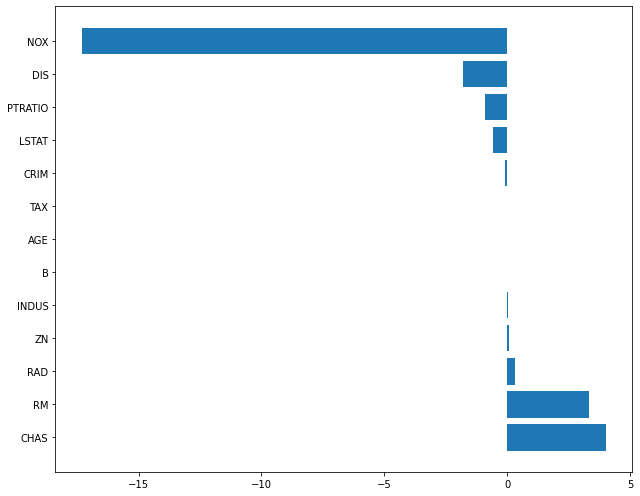

In [42]:
plot_coef(x_train.columns, ridge.coef_)

In [43]:
ridge_100 = Ridge( alpha = 100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge( alpha =0.01)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

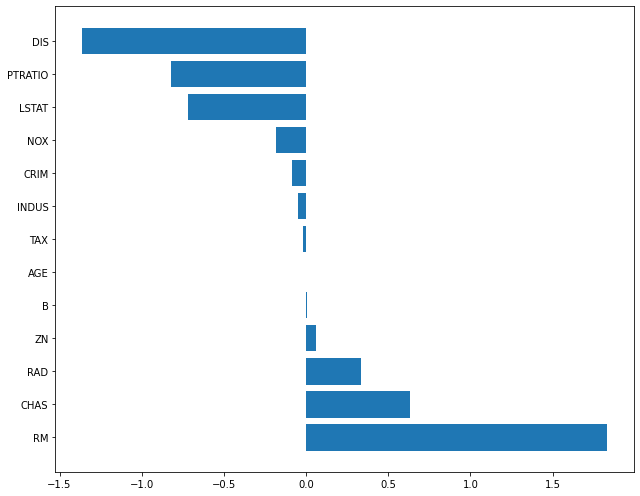

In [44]:
plot_coef(x_train.columns, ridge_100.coef_)

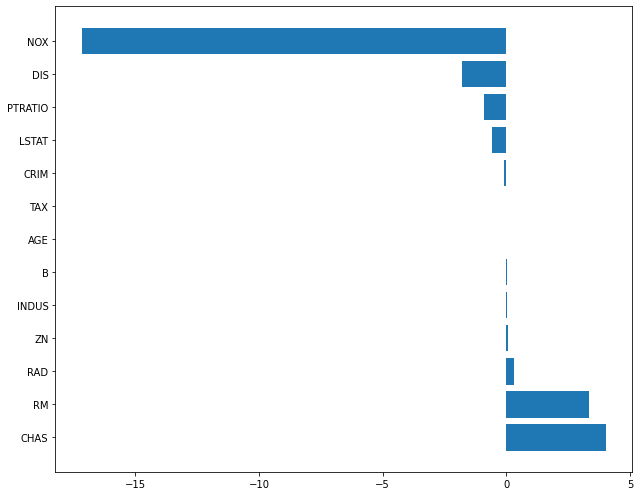

In [45]:
plot_coef(x_train.columns, ridge_001.coef_)

In [47]:
from sklearn.linear_model import Lasso

In [49]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

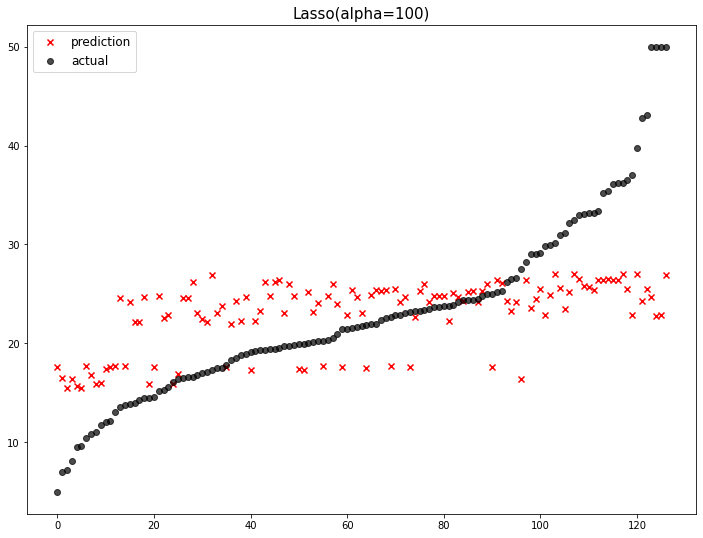

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


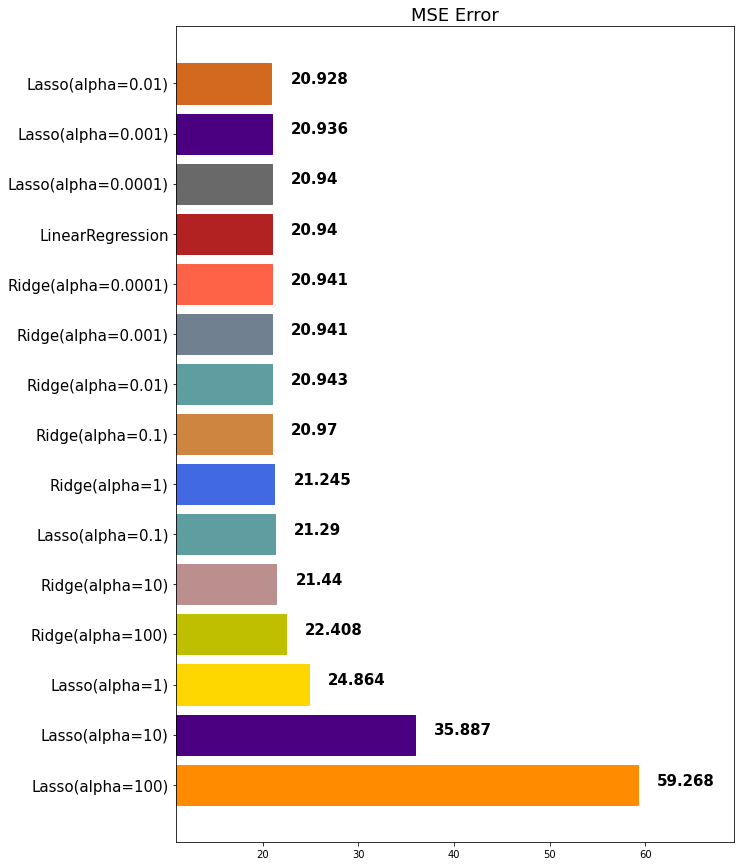

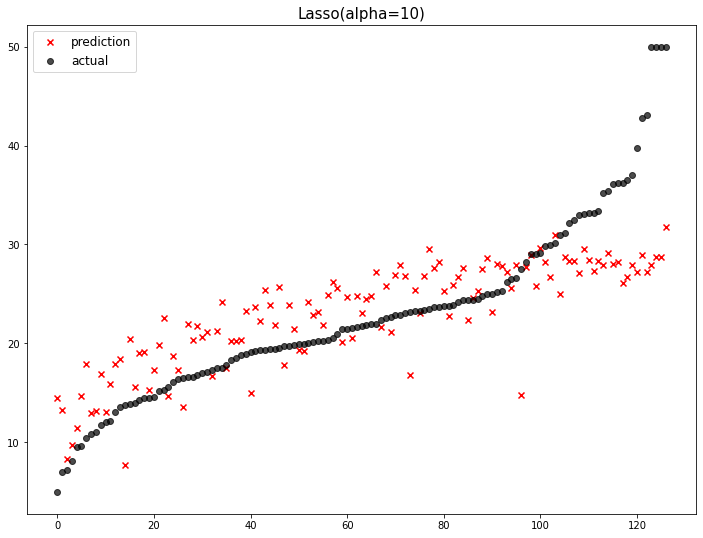

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


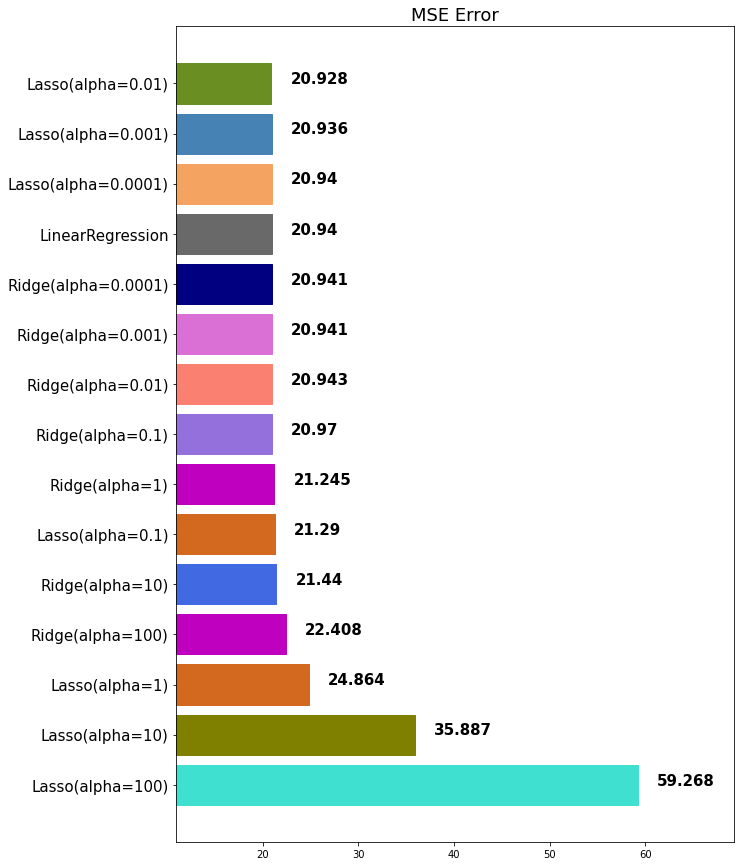

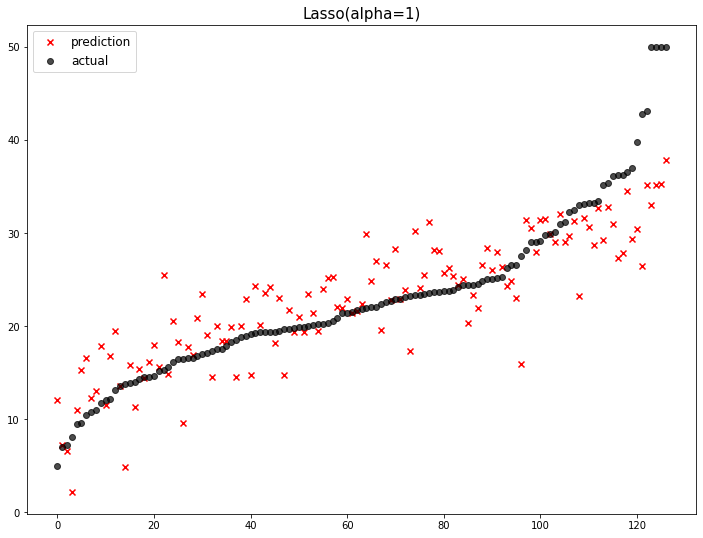

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


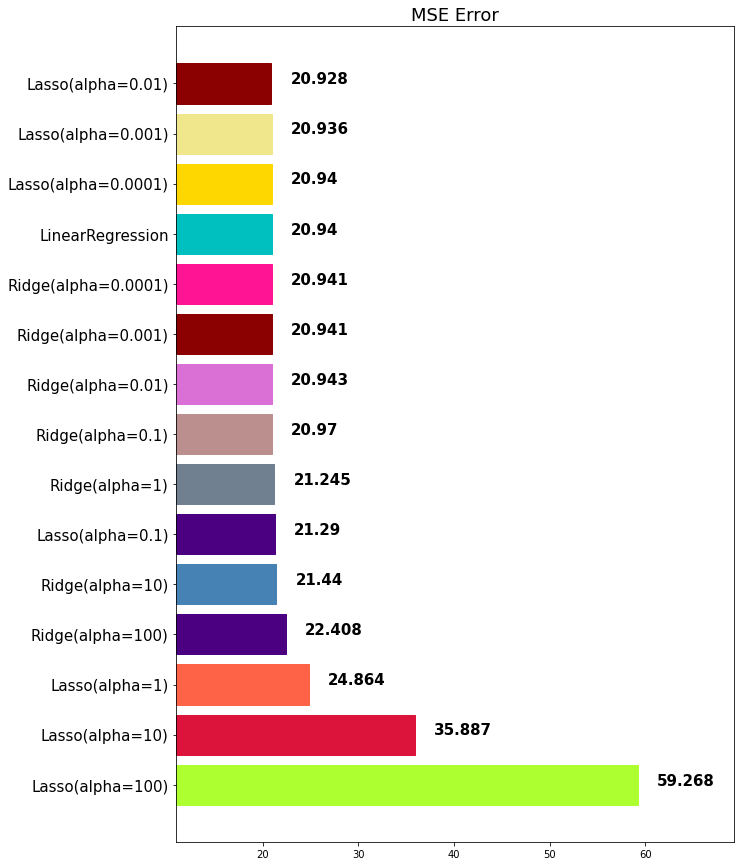

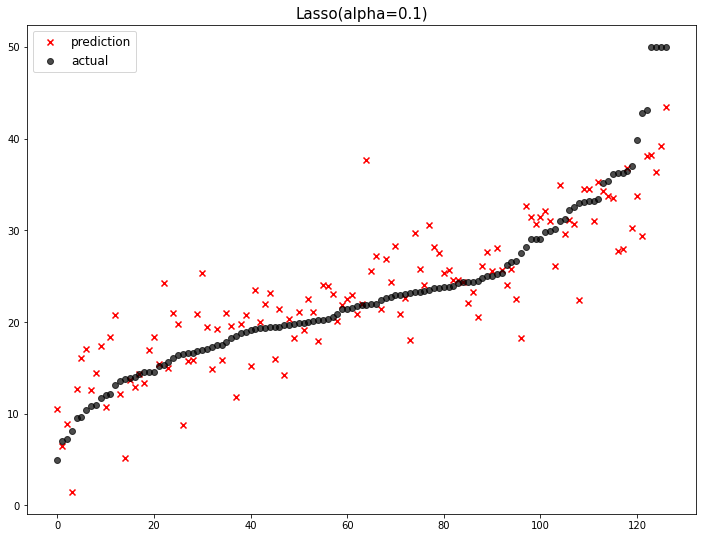

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


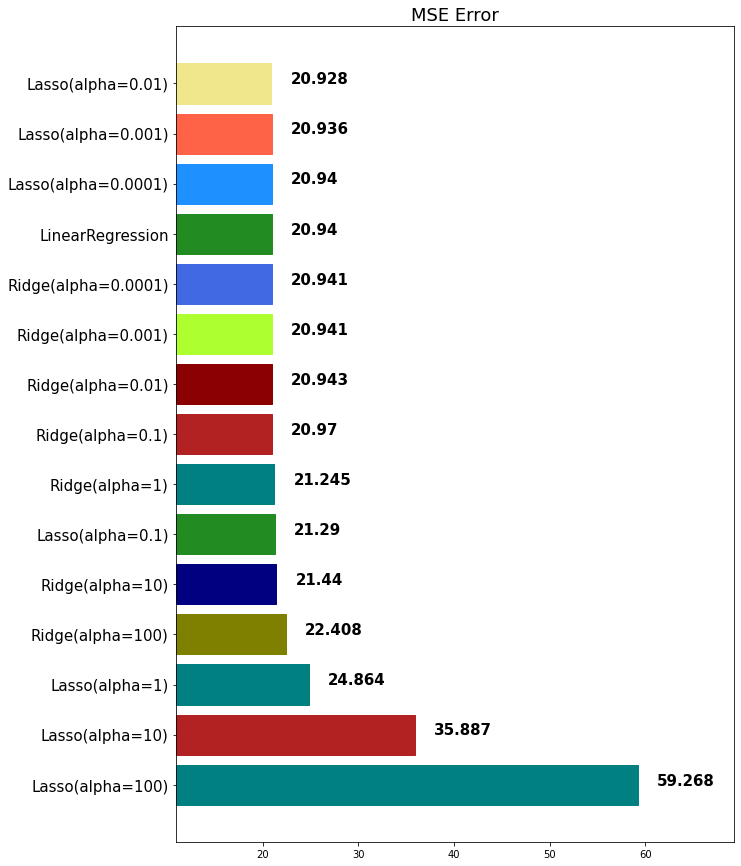

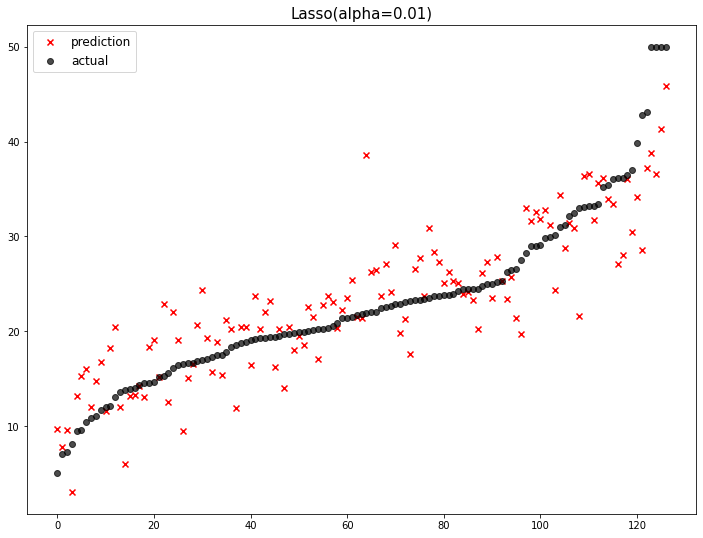

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


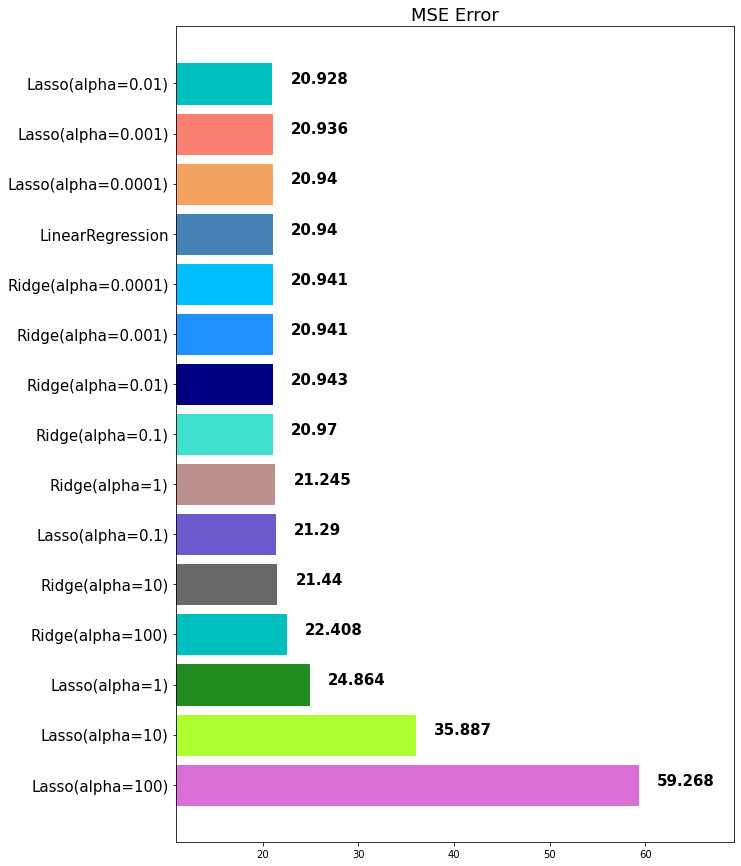

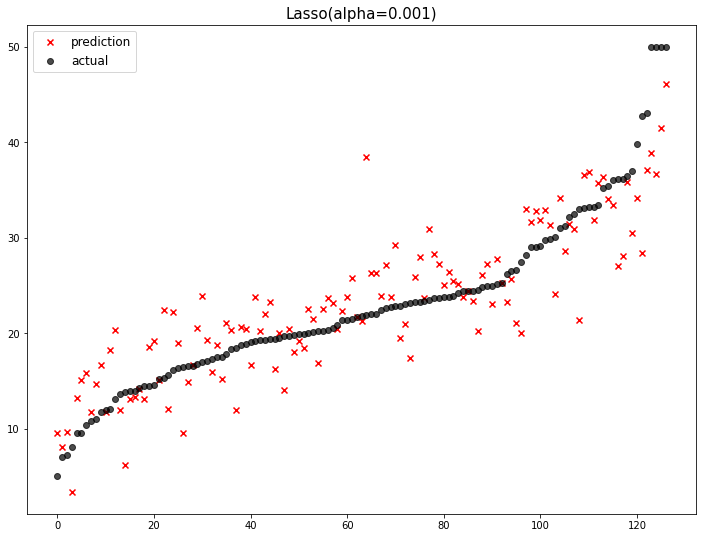

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


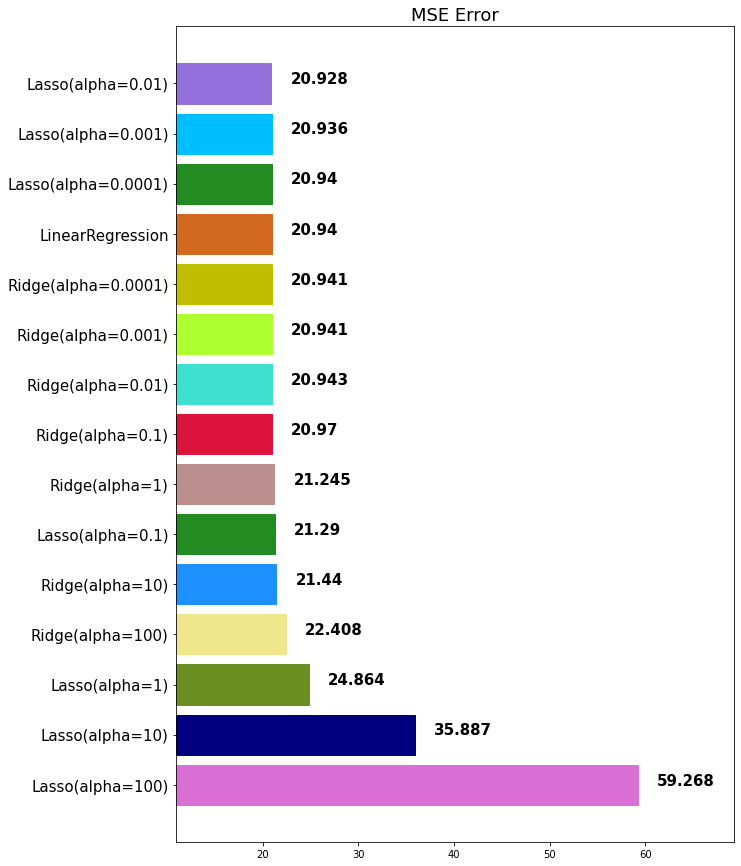

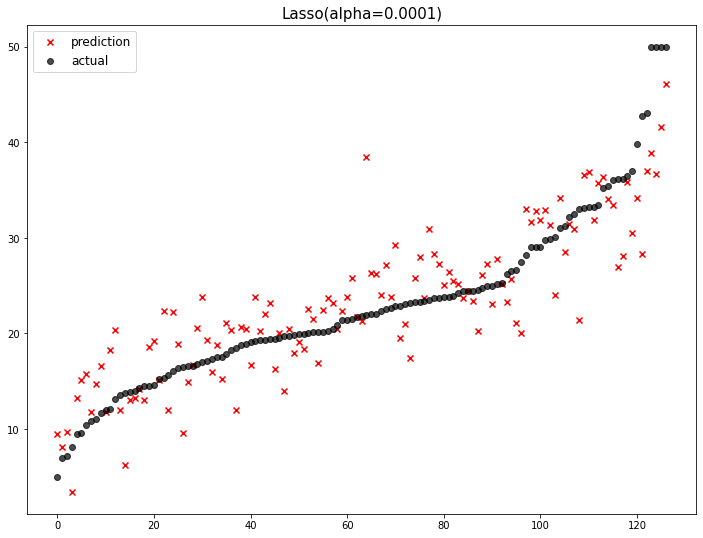

                  model        mse
0      Lasso(alpha=100)  59.267552
1       Lasso(alpha=10)  35.886608
2        Lasso(alpha=1)  24.864051
3      Ridge(alpha=100)  22.408276
4       Ridge(alpha=10)  21.439933
5      Lasso(alpha=0.1)  21.289786
6        Ridge(alpha=1)  21.244627
7      Ridge(alpha=0.1)  20.969924
8     Ridge(alpha=0.01)  20.943110
9    Ridge(alpha=0.001)  20.940748
10  Ridge(alpha=0.0001)  20.940516
11     LinearRegression  20.940490
12  Lasso(alpha=0.0001)  20.939961
13   Lasso(alpha=0.001)  20.935572
14    Lasso(alpha=0.01)  20.928464


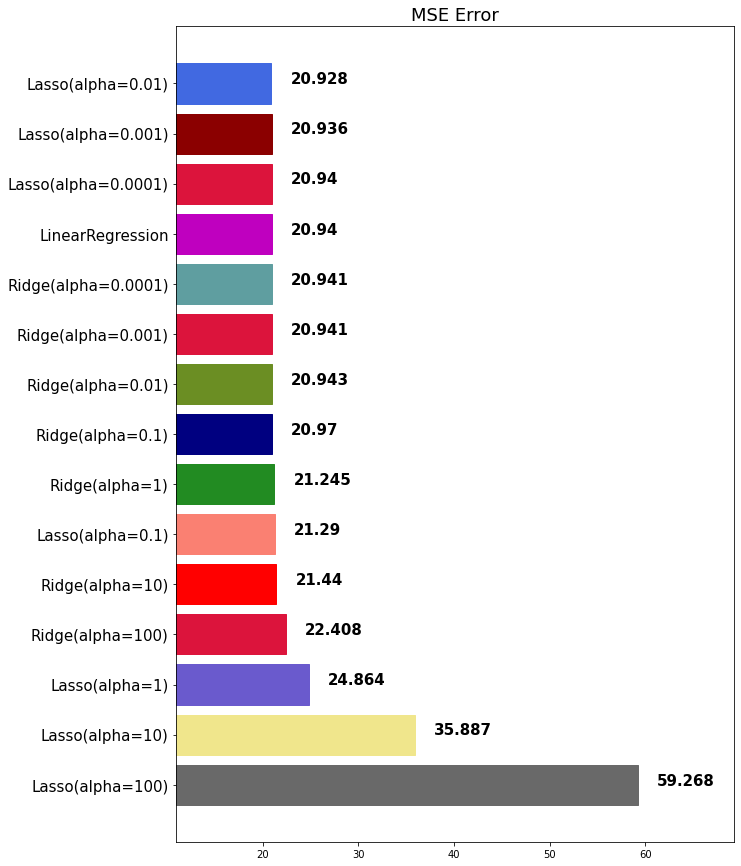

In [51]:
for alpha in alphas:
    lasso = Lasso(alpha = alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [53]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

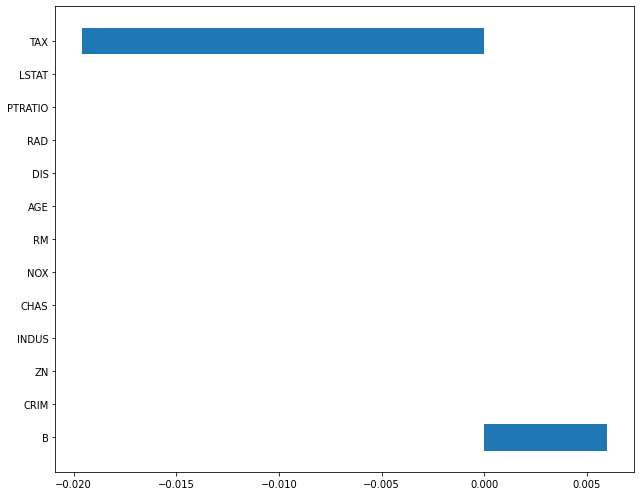

In [54]:
plot_coef(x_train.columns, lasso_100.coef_)

In [55]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.01960036,
       -0.        ,  0.00598817, -0.        ])

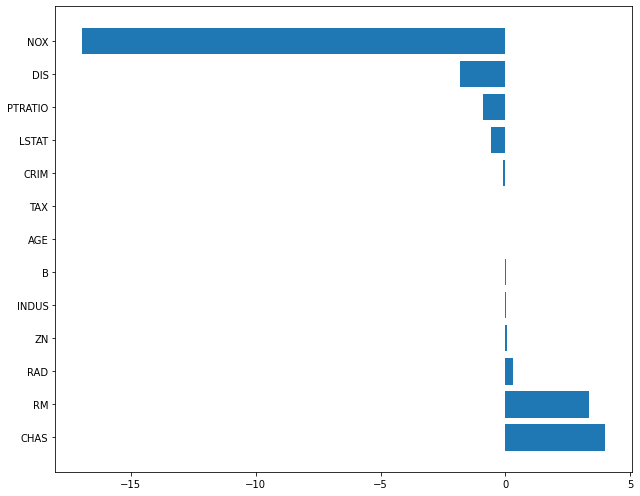

In [56]:
plot_coef(x_train.columns, lasso_001.coef_)

In [57]:
lasso_001.coef_

array([ -0.08944831,   0.06034235,   0.01560641,   4.00871757,
       -16.97233282,   3.33777452,  -0.00892912,  -1.80203368,
         0.30977431,  -0.01258427,  -0.90756931,   0.00788583,
        -0.57731876])

### ElasticNet

**l1_ratio (default=0.5)**

 * l1_ratio = 0 (L2 Only). 
 * l1_ratio = 1 (L1 Only). 
 * 0 < l1_ratio < 1 (L1 and L2 mix)

In [58]:
from sklearn.linear_model import ElasticNet

In [59]:
ratios = [0.2, 0.5, 0.8]

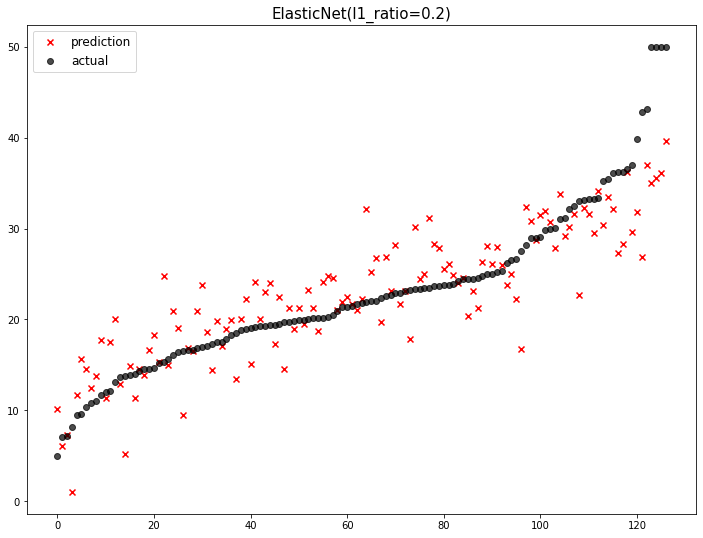

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4           Ridge(alpha=100)  22.408276
5            Ridge(alpha=10)  21.439933
6           Lasso(alpha=0.1)  21.289786
7             Ridge(alpha=1)  21.244627
8           Ridge(alpha=0.1)  20.969924
9          Ridge(alpha=0.01)  20.943110
10        Ridge(alpha=0.001)  20.940748
11       Ridge(alpha=0.0001)  20.940516
12          LinearRegression  20.940490
13       Lasso(alpha=0.0001)  20.939961
14        Lasso(alpha=0.001)  20.935572
15         Lasso(alpha=0.01)  20.928464


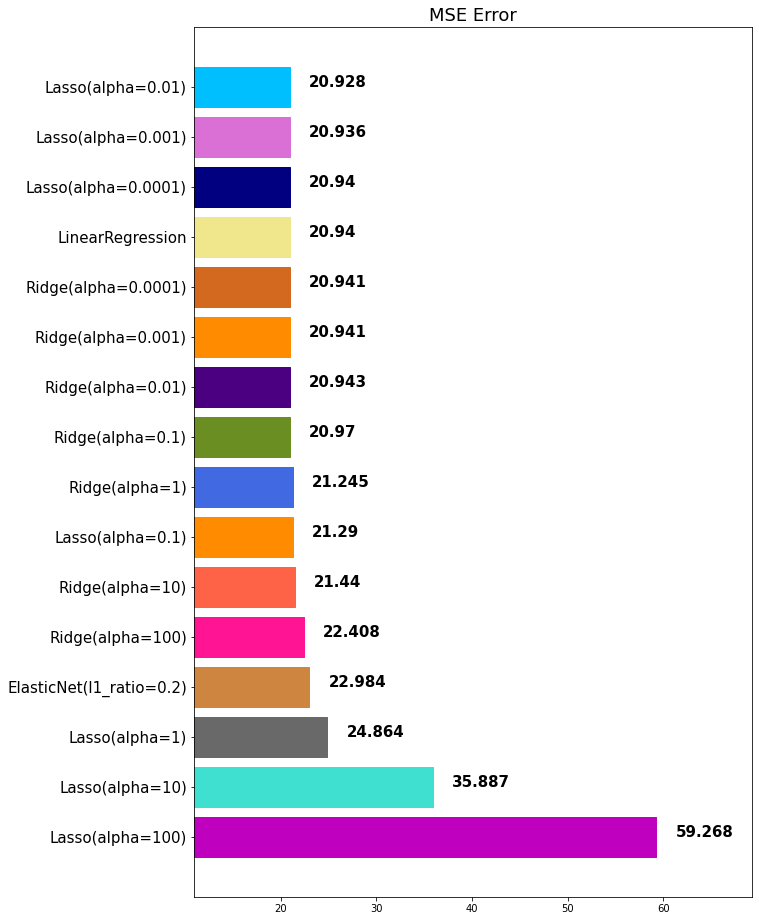

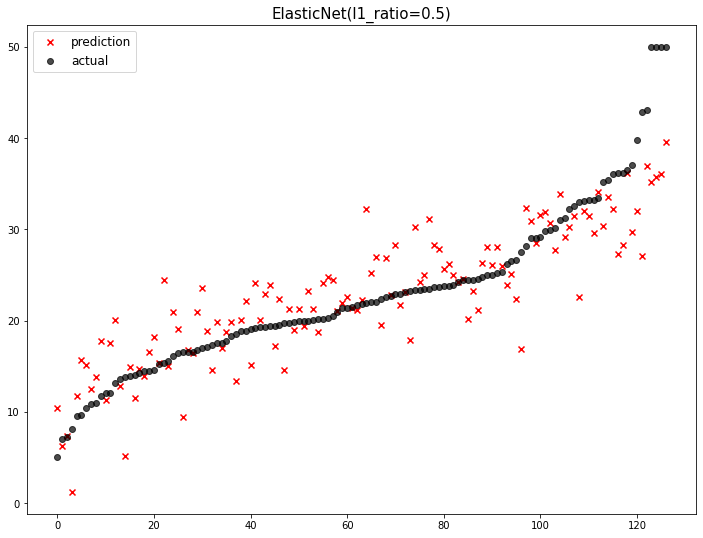

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4   ElasticNet(l1_ratio=0.5)  22.862576
5           Ridge(alpha=100)  22.408276
6            Ridge(alpha=10)  21.439933
7           Lasso(alpha=0.1)  21.289786
8             Ridge(alpha=1)  21.244627
9           Ridge(alpha=0.1)  20.969924
10         Ridge(alpha=0.01)  20.943110
11        Ridge(alpha=0.001)  20.940748
12       Ridge(alpha=0.0001)  20.940516
13          LinearRegression  20.940490
14       Lasso(alpha=0.0001)  20.939961
15        Lasso(alpha=0.001)  20.935572
16         Lasso(alpha=0.01)  20.928464


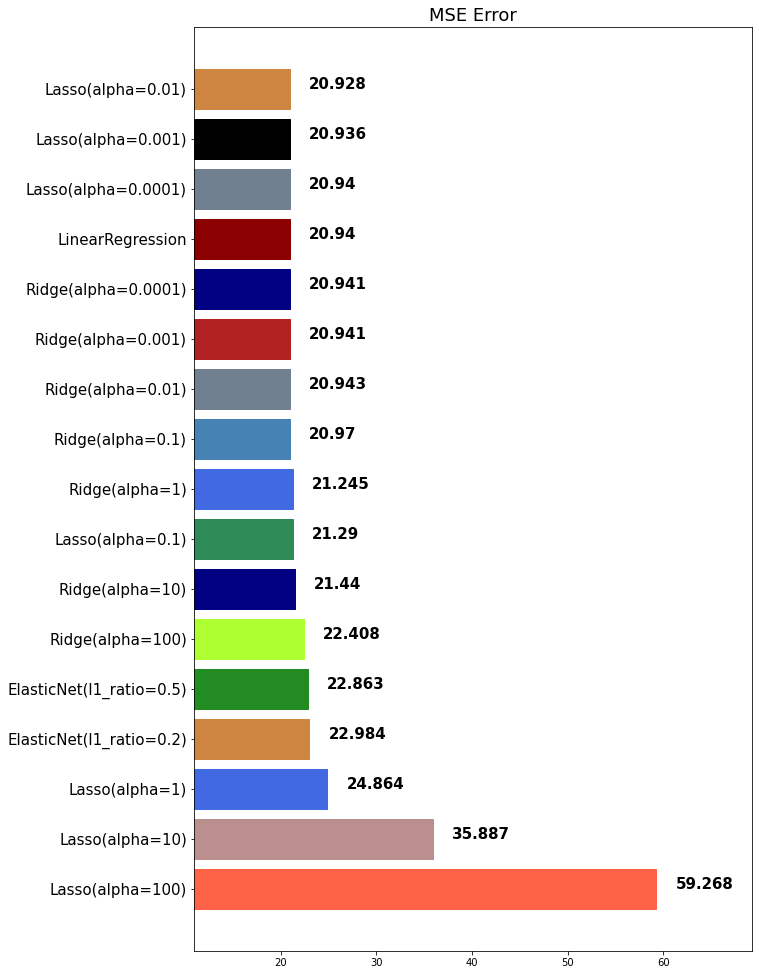

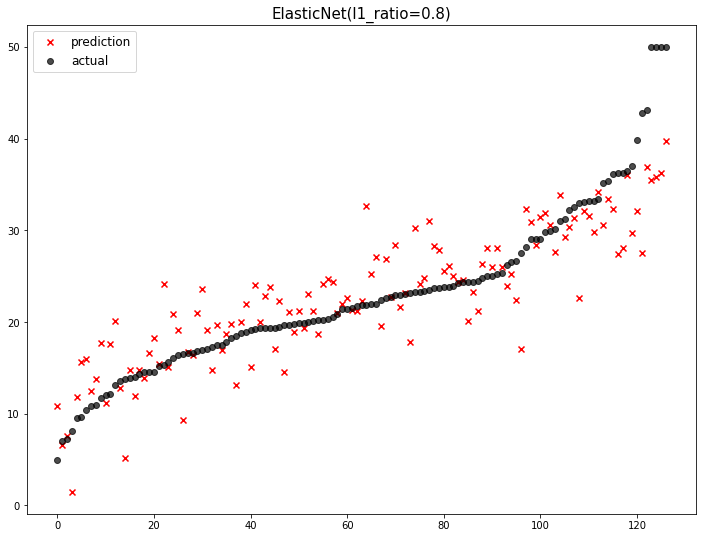

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4   ElasticNet(l1_ratio=0.5)  22.862576
5   ElasticNet(l1_ratio=0.8)  22.544002
6           Ridge(alpha=100)  22.408276
7            Ridge(alpha=10)  21.439933
8           Lasso(alpha=0.1)  21.289786
9             Ridge(alpha=1)  21.244627
10          Ridge(alpha=0.1)  20.969924
11         Ridge(alpha=0.01)  20.943110
12        Ridge(alpha=0.001)  20.940748
13       Ridge(alpha=0.0001)  20.940516
14          LinearRegression  20.940490
15       Lasso(alpha=0.0001)  20.939961
16        Lasso(alpha=0.001)  20.935572
17         Lasso(alpha=0.01)  20.928464


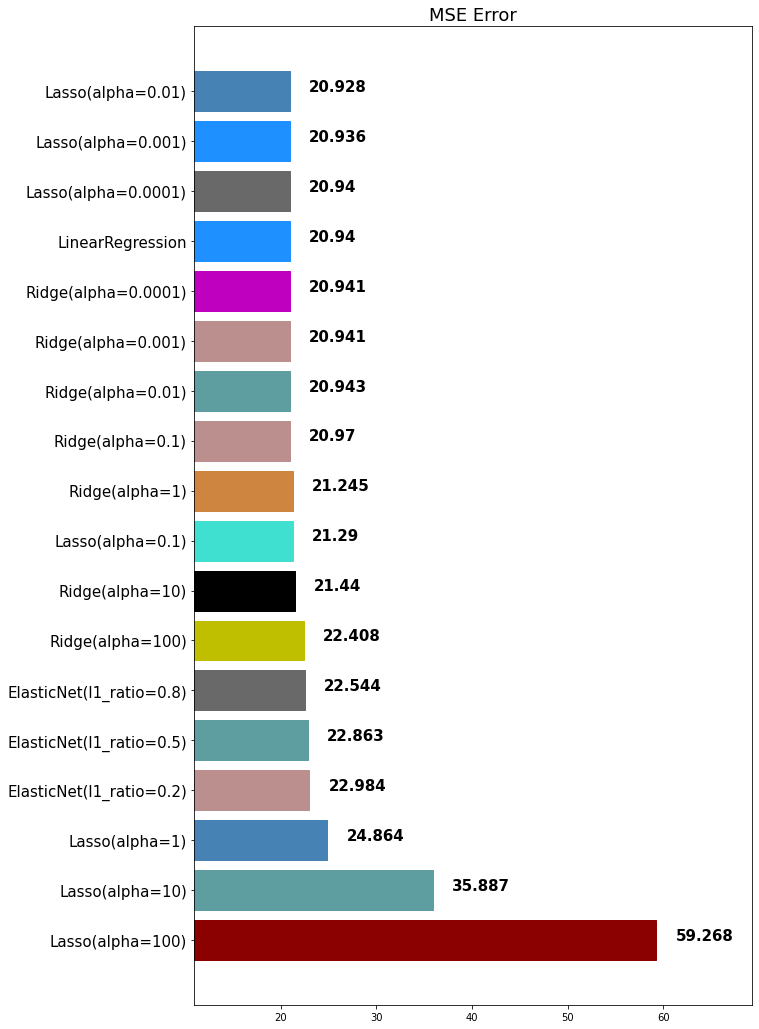

In [61]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio = ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [64]:
elsticnet_20 = ElasticNet( alpha=5, l1_ratio= 0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet (alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

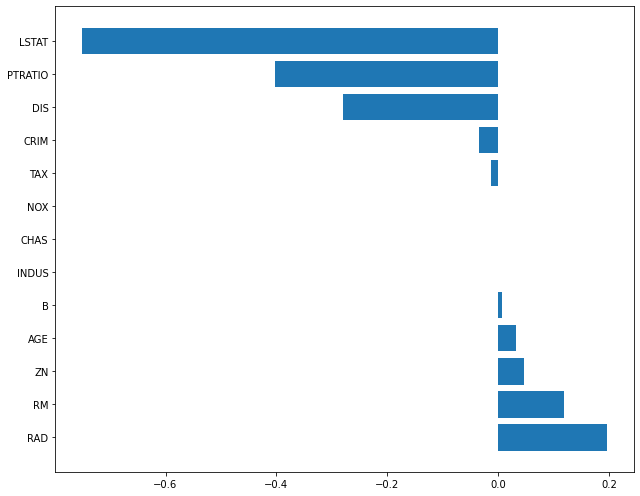

In [65]:
plot_coef(x_train.columns, elsticnet_20.coef_)

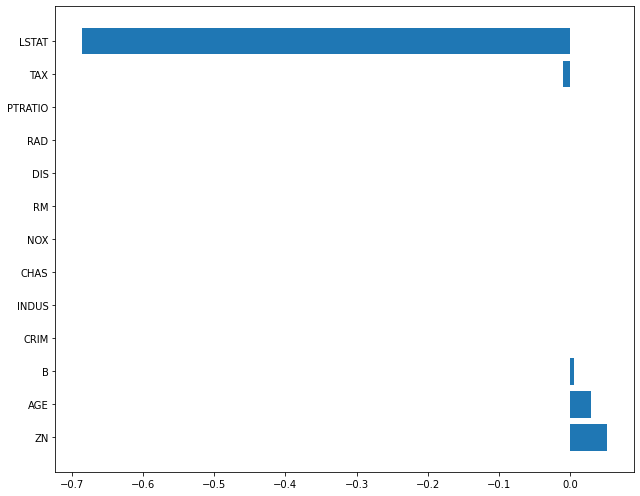

In [ ]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [66]:
elsticnet_80.coef_

array([-0.        ,  0.03504211, -0.        ,  0.        ,  0.        ,
        0.        ,  0.03105341, -0.        ,  0.        , -0.00607868,
       -0.03217126,  0.00624478, -0.75798064])

## Scaler

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [68]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.00000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.728561,11.488127,11.319525,0.05277,0.557081,6.254348,69.123219,3.737401,9.870712,414.564644,18.477836,354.871741,12.772639
std,7.913869,24.267016,6.913355,0.22387,0.115808,0.706502,27.761882,2.077100,8.872803,169.669607,2.193988,95.355992,7.256323
min,0.006320,0.000000,0.460000,0.00000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.980000
25%,0.079960,0.000000,5.160000,0.00000,0.453000,5.877500,44.400000,2.068550,4.000000,284.000000,17.400000,375.270000,7.185000
50%,0.303470,0.000000,9.900000,0.00000,0.538000,6.182000,77.700000,3.262800,5.000000,334.000000,19.100000,391.700000,11.640000
75%,4.130400,0.000000,18.100000,0.00000,0.631000,6.611000,94.300000,5.108550,24.000000,666.000000,20.200000,396.220000,17.025000
max,73.534100,100.000000,27.740000,1.00000,0.871000,8.704000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### StandardScaler

In [69]:
std_scaler = StandardScaler()

In [70]:
std_scaled = std_scaler.fit_transform(x_train)

In [71]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.47,-0.47,-1.57,-0.24,-1.49,-3.82,-2.39,-1.26,-1.00,-1.34,-2.68,-3.72,-1.49
25%,-0.46,-0.47,-0.89,-0.24,-0.90,-0.53,-0.89,-0.80,-0.66,-0.77,-0.49,0.21,-0.77
50%,-0.43,-0.47,-0.21,-0.24,-0.16,-0.10,0.31,-0.23,-0.55,-0.48,0.28,0.39,-0.16
75%,0.05,-0.47,0.98,-0.24,0.64,0.51,0.91,0.66,1.59,1.48,0.79,0.43,0.59
max,8.83,3.65,2.38,4.24,2.71,3.47,1.11,3.36,1.59,1.75,1.61,0.44,3.48


### MinMaxScaler

In [72]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [73]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.11,0.40,0.05,0.35,0.52,0.68,0.27,0.39,0.43,0.63,0.89,0.30
std,0.11,0.24,0.25,0.22,0.24,0.14,0.29,0.22,0.39,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.14,0.45,0.43,0.10,0.13,0.18,0.51,0.95,0.14
50%,0.00,0.00,0.35,0.00,0.31,0.51,0.77,0.22,0.17,0.28,0.69,0.99,0.27
75%,0.06,0.00,0.65,0.00,0.51,0.59,0.94,0.42,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

In [75]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [76]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

In [77]:
from sklearn.pipeline import make_pipeline

In [81]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio= 0.2)
)

In [82]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

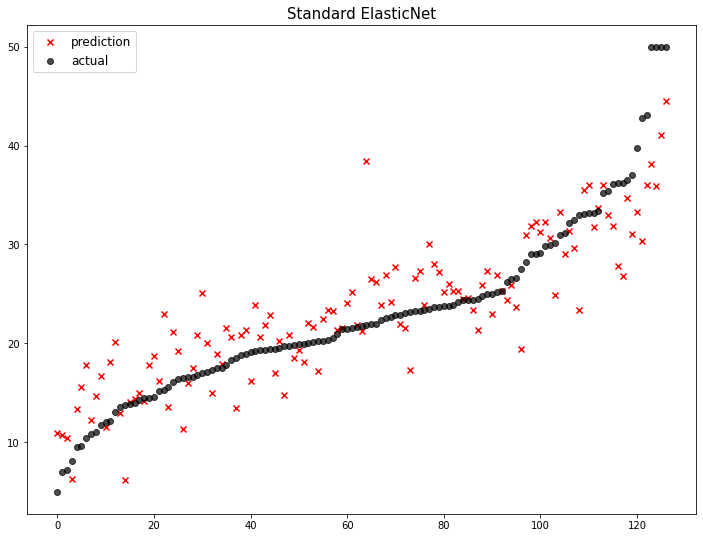

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4   ElasticNet(l1_ratio=0.5)  22.862576
5   ElasticNet(l1_ratio=0.8)  22.544002
6           Ridge(alpha=100)  22.408276
7            Ridge(alpha=10)  21.439933
8           Lasso(alpha=0.1)  21.289786
9             Ridge(alpha=1)  21.244627
10          Ridge(alpha=0.1)  20.969924
11         Ridge(alpha=0.01)  20.943110
12        Ridge(alpha=0.001)  20.940748
13       Ridge(alpha=0.0001)  20.940516
14          LinearRegression  20.940490
15       Lasso(alpha=0.0001)  20.939961
16        Lasso(alpha=0.001)  20.935572
17         Lasso(alpha=0.01)  20.928464
18       Standard ElasticNet  19.861906


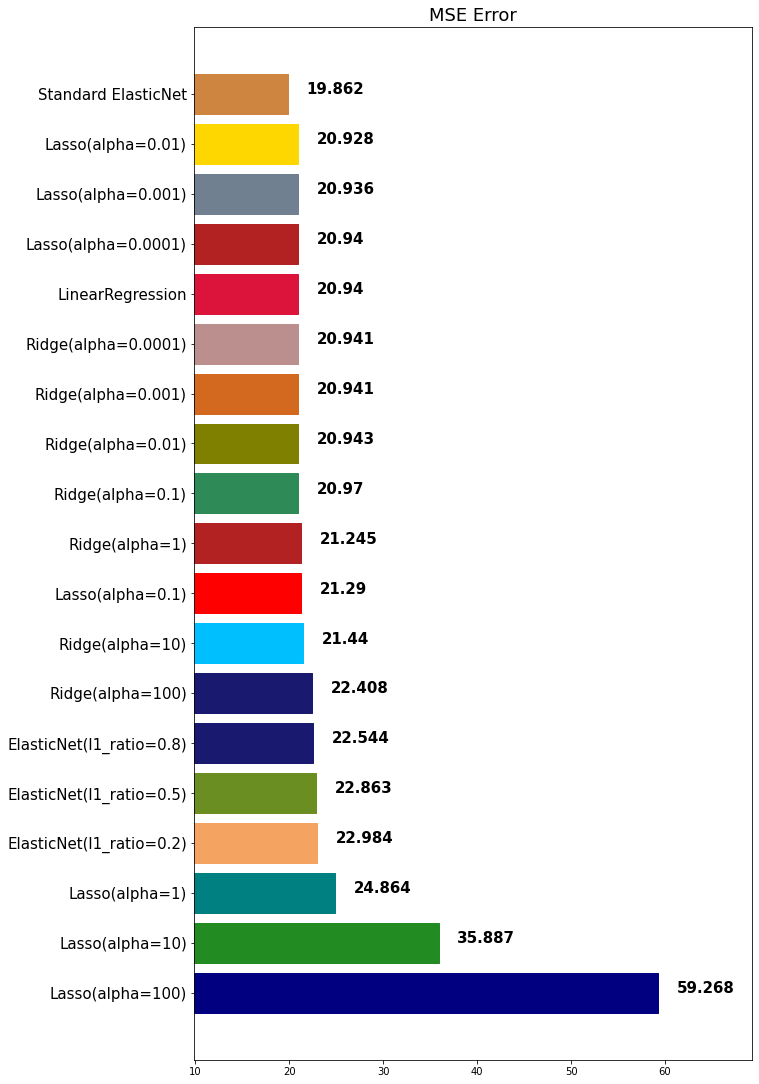

In [83]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

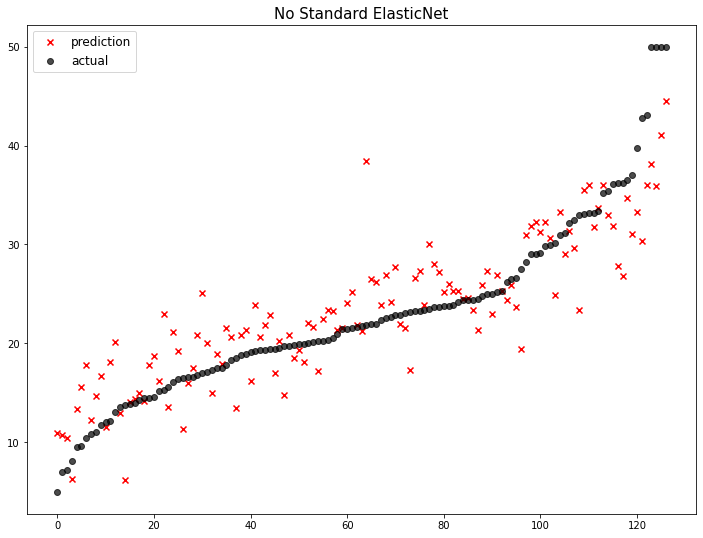

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4   ElasticNet(l1_ratio=0.5)  22.862576
5   ElasticNet(l1_ratio=0.8)  22.544002
6           Ridge(alpha=100)  22.408276
7            Ridge(alpha=10)  21.439933
8           Lasso(alpha=0.1)  21.289786
9             Ridge(alpha=1)  21.244627
10          Ridge(alpha=0.1)  20.969924
11         Ridge(alpha=0.01)  20.943110
12        Ridge(alpha=0.001)  20.940748
13       Ridge(alpha=0.0001)  20.940516
14          LinearRegression  20.940490
15       Lasso(alpha=0.0001)  20.939961
16        Lasso(alpha=0.001)  20.935572
17         Lasso(alpha=0.01)  20.928464
18       Standard ElasticNet  19.861906
19    No Standard ElasticNet  19.861906


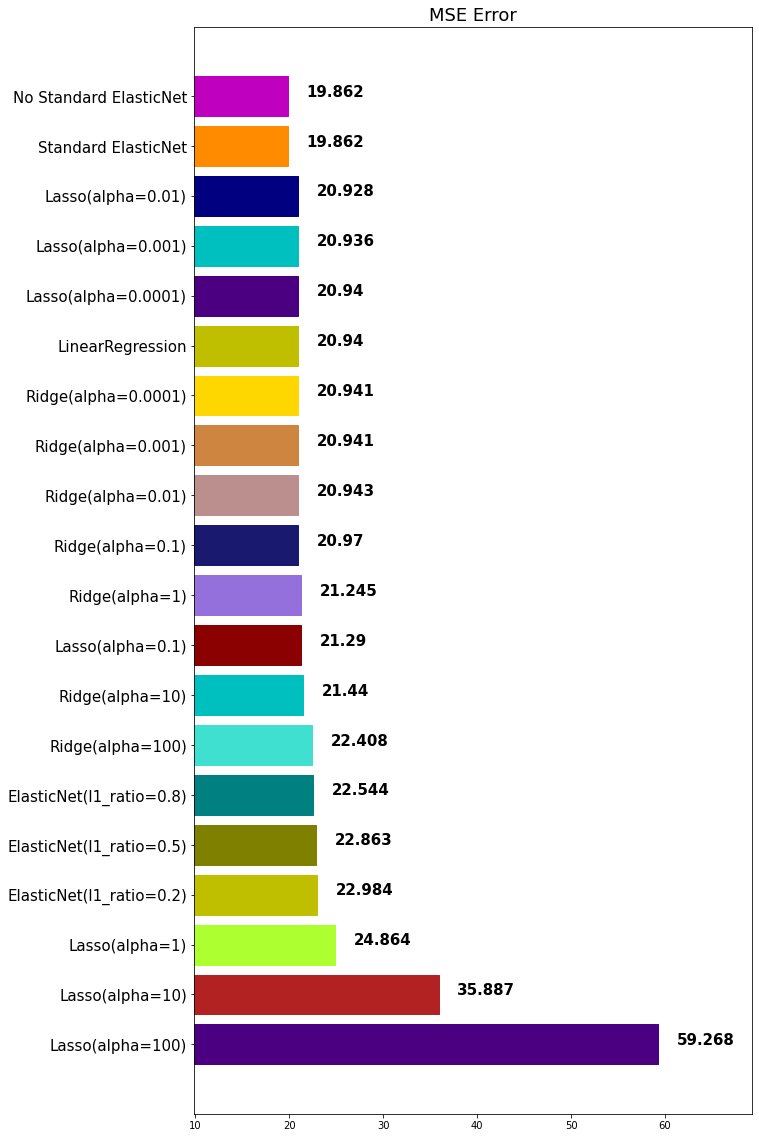

In [85]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio =0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

### Polynomial Features

In [86]:
from sklearn.preprocessing import PolynomialFeatures

In [87]:
poly = PolynomialFeatures(degree=2, include_bias= False)

In [88]:
poly_features = poly.fit_transform(x_train)[0]

In [89]:
poly_features

array([     0.40202   ,      0.        ,      9.9       ,      0.        ,
            0.544     ,      6.382     ,     67.2       ,      3.5325    ,
            4.        ,    304.        ,     18.4       ,    395.21      ,
           10.36      ,      0.16162008,      0.        ,      3.979998  ,
            0.        ,      0.21869888,      2.56569164,     27.015744  ,
            1.42013565,      1.60808   ,    122.21408   ,      7.397168  ,
          158.8823242 ,      4.1649272 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,     98.01      ,      0.        ,
            5.3856    ,     63.1818    ,    665.28      ,     34.97175   ,
           39.6       ,   3009.6       ,    182.16      ,   3912.579     ,
          102.564     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [90]:
x_train.iloc[0]

CRIM         0.40202
ZN           0.00000
INDUS        9.90000
CHAS         0.00000
NOX          0.54400
RM           6.38200
AGE         67.20000
DIS          3.53250
RAD          4.00000
TAX        304.00000
PTRATIO     18.40000
B          395.21000
LSTAT       10.36000
Name: 318, dtype: float64

In [91]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [92]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.697e+01, tolerance: 3.243e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


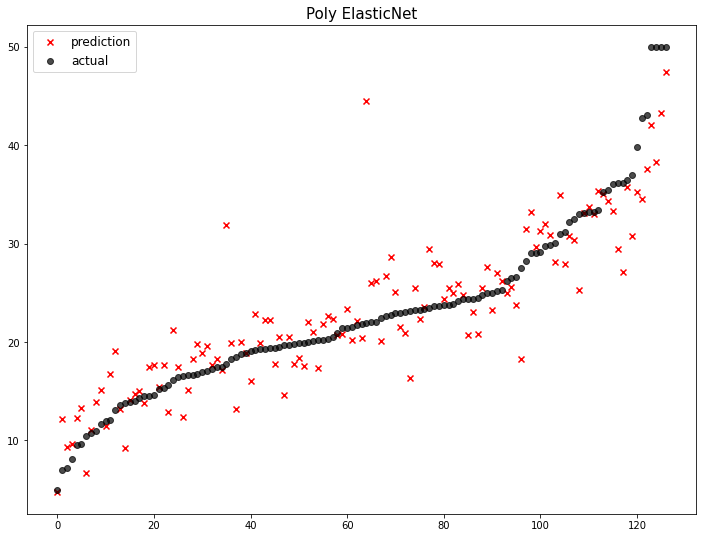

                       model        mse
0           Lasso(alpha=100)  59.267552
1            Lasso(alpha=10)  35.886608
2             Lasso(alpha=1)  24.864051
3   ElasticNet(l1_ratio=0.2)  22.983949
4   ElasticNet(l1_ratio=0.5)  22.862576
5   ElasticNet(l1_ratio=0.8)  22.544002
6           Ridge(alpha=100)  22.408276
7            Ridge(alpha=10)  21.439933
8           Lasso(alpha=0.1)  21.289786
9             Ridge(alpha=1)  21.244627
10          Ridge(alpha=0.1)  20.969924
11         Ridge(alpha=0.01)  20.943110
12        Ridge(alpha=0.001)  20.940748
13       Ridge(alpha=0.0001)  20.940516
14          LinearRegression  20.940490
15       Lasso(alpha=0.0001)  20.939961
16        Lasso(alpha=0.001)  20.935572
17         Lasso(alpha=0.01)  20.928464
18       Standard ElasticNet  19.861906
19    No Standard ElasticNet  19.861906
20           Poly ElasticNet  17.213187


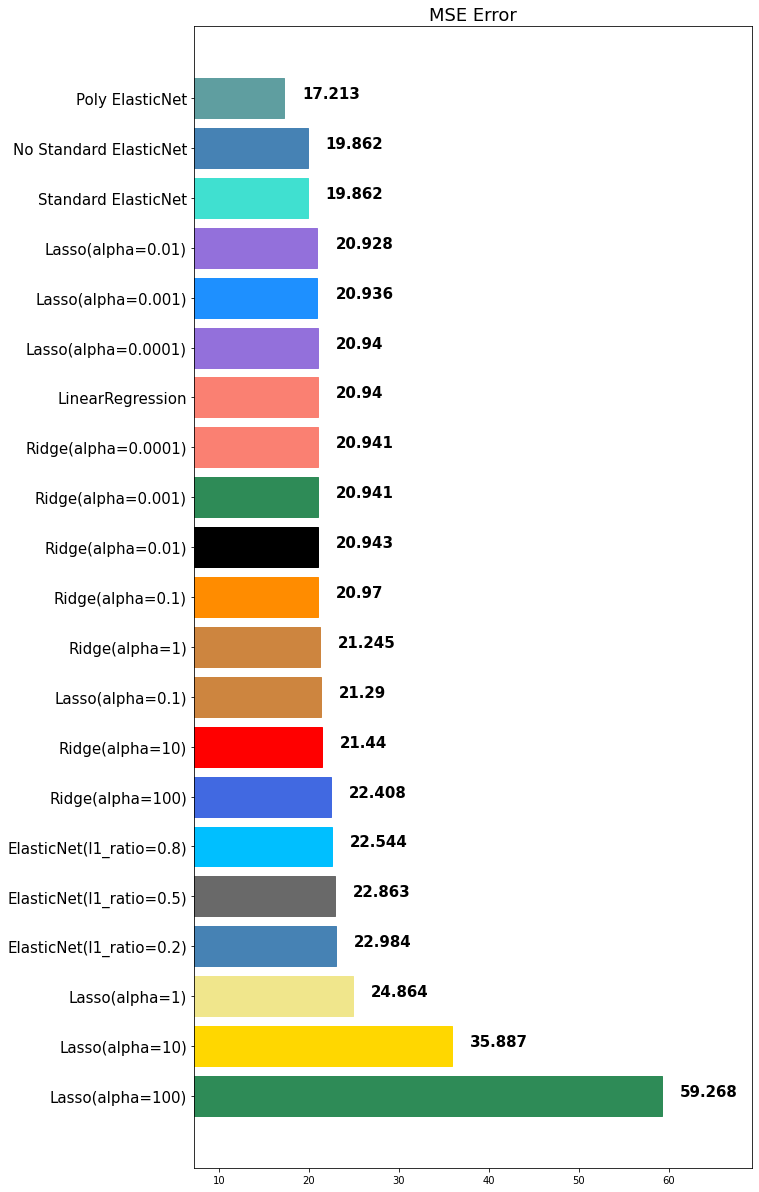

In [93]:
mse_eval('Poly ElasticNet', poly_pred, y_test)